In [2]:
import sys
from os.path import join

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

sys.path.append("../")
import GSHEWaveform


%load_ext autoreload
%autoreload 2
# %matplotlib notebook
%matplotlib inline
tosave = True
fout = "/Users/richard/Downloads/"
# fout = "/home/miguel/code/notebooks/GSHE/plots/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


NameError: name 'betalims' is not defined

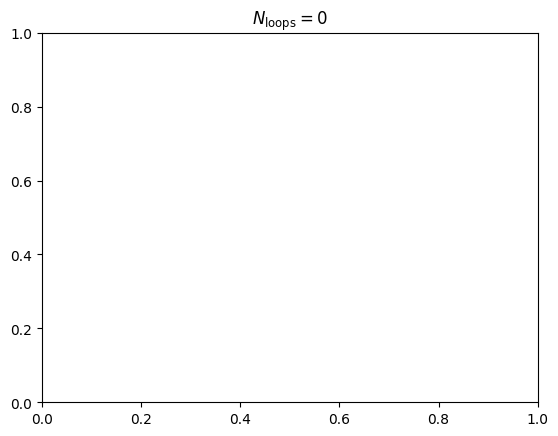

In [3]:
plt.figure()
plt.title(r"$N_{\rm loops} = 0$")
plt.plot(betalims, ups_unsign, label=r"All $\beta$")#MZ: changed ups->ups_unsign
plt.plot(betalims, ups_plus, label=r"$\beta > 0$")
plt.plot(betalims, ups_minus, label=r"$\beta < 0$")


plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.ylabel(r"$\Upsilon_{\rm obs}(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")
plt.grid(alpha=0.1)
plt.tight_layout()
# plt.savefig("/Users/richard/Downloads/res.png", dpi=300)
plt.show()

# Sign dependence of $\Upsilon_{\rm src}$

Eliminating 147 point due to beta with average 0.9592 loops.


/Users/richard/Projects/birefringence/venv_gshe/lib/python3.11/site-packages/GSHEWaveform/shadow.py:108: RuntimeWarning: invalid value encountered in sqrt
  area = numpy.sqrt(1 / (1 - radius2))  # Area element in spherical coords


Eliminating 92 point due to beta with average 0.7500 loops.


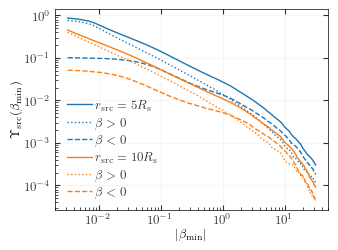

In [6]:
def get_beta(run):
    data = GSHEWaveform.read_shooting(run, "../results", 0.2)
    betas = GSHEWaveform.read_signed_beta(data)
    hull = GSHEWaveform.build_shadowhull(data["grid"], betas, N=200)
    betas = GSHEWaveform.fillshadow(data["grid"], betas, hull)
    return data, betas


betalims = np.logspace(-2.5, 1.5, 1000)
dists = {13: 5, 14: 7.5, 15: 10}
GSHEWaveform.setmplstyle("../plot_style.txt")
cols = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.figure()
# plt.title(r"Dependence of $\Upsilon_{\rm src}$ on $\mathrm{sign}(\beta)$")
for i, run in enumerate([13, 15]):
    data, betas = get_beta(run)
    ups_unsign = GSHEWaveform.get_upsilon_src(data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0])
    ups_plus = GSHEWaveform.get_upsilon_src(data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0], beta_sign=1)
    ups_minus = GSHEWaveform.get_upsilon_src(data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0], beta_sign=-1)
    plt.plot(betalims, ups_unsign, c=cols[i],
             label=r"$r_{{\rm src}} = {} R_{{\rm s}}$".format(dists[run]))
    plt.plot(betalims, ups_plus, c=cols[i], ls="dotted",
             label=r"$\beta > 0$")
    plt.plot(betalims, ups_minus, c=cols[i], ls="dashed",
             label=r"$\beta < 0$")




plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\Upsilon_{\rm src}(\beta_{\rm min})$")
plt.xlabel(r"$|\beta_{\rm min}|$")
plt.grid(alpha=0.1)
plt.legend()
plt.tight_layout()

if tosave:
    plt.savefig(join(fout, "ups_source.pdf"), dpi=450)
plt.show()

Eliminating 147 point due to beta with average 0.9592 loops.


/Users/richard/Projects/birefringence/venv_gshe/lib/python3.11/site-packages/GSHEWaveform/shadow.py:213: RuntimeWarning: invalid value encountered in sqrt
  area = numpy.sqrt(1 / (1 - radius2)) / numpy.abs(magnification)


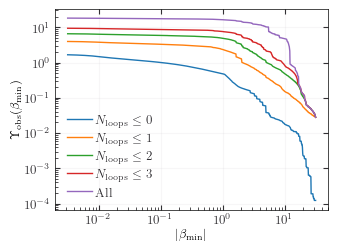

In [7]:
def get_beta_mu(run):
    data = GSHEWaveform.read_shooting(run, "../results", 0.2)
    betas = GSHEWaveform.read_signed_beta(data)
    hull = GSHEWaveform.build_shadowhull(data["grid"], betas, N=200)
    betas = GSHEWaveform.fillshadow(data["grid"], betas, hull)
    
    mu = np.abs(data["Xgeo"][:, 8])
    hull = GSHEWaveform.build_shadowhull(data["grid"], mu, N=200)
    mu = GSHEWaveform.fillshadow(data["grid"], mu, hull)

    return data, betas, mu


betalims = np.logspace(-2.5, 1.5, 1000)
dists = {13: 5, 14: 7.5, 15: 10}
ls = ["solid", "dotted"]
cols = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.figure()
data, betas, mu = get_beta_mu(13)
GSHEWaveform.setmplstyle("../plot_style.txt")
for j, nloop_max in enumerate([0, 1, 2, 3, None]):
    ups = GSHEWaveform.get_upsilon_obs(
            data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0],
            magnification=mu, nloops=data["Xgeo"][:, 5], nloop_max=nloop_max)
    label=r"$N_{{\rm loops}} \leq {}$".format(nloop_max) if nloop_max is not None else "All"
    plt.plot(betalims, ups,label=label, c=cols[j])

plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\Upsilon_{\rm obs}(\beta_{\rm min})$")
plt.xlabel(r"$|\beta_{\rm min}|$")
plt.grid(alpha=0.1)
plt.legend()
plt.tight_layout()
if tosave:
    plt.savefig(join(fout, "ups_obs_loops.pdf"), dpi=450)
plt.show()

Eliminating 147 point due to beta with average 0.9592 loops.


/home/miguel/code/GSHE/scripts/../GSHEWaveform/shadow.py:213: RuntimeWarning: invalid value encountered in sqrt
  area = numpy.sqrt(1 / (1 - radius2)) / numpy.abs(magnification)


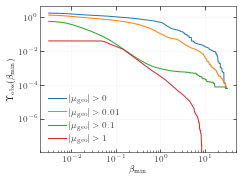

In [19]:
data = GSHEWaveform.read_shooting(13, "../data", 0.2)

betas = GSHEWaveform.read_signed_beta(data)
hull = GSHEWaveform.build_shadowhull(data["grid"], betas, N=200)
betas = GSHEWaveform.fillshadow(data["grid"], betas, hull)


mu = np.abs(data["Xgeo"][:, 8])
hull = GSHEWaveform.build_shadowhull(data["grid"], mu, N=200)
mu = GSHEWaveform.fillshadow(data["grid"], mu, hull)
betalims = np.logspace(-2.5, 1.5, 1000)

GSHEWaveform.setmplstyle("../plot_style.txt")
plt.figure()
for th in [0, 0.01, 0.1, 1]:
    ups = GSHEWaveform.get_upsilon_obs(
            data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0],
            magnification=mu, nloops=data["Xgeo"][:, 5], min_magnification=th, nloop_max=0)
    plt.plot(betalims, ups, label=r"$|\mu_{{\rm geo}}| > {}$".format(th))


plt.xscale("log")
plt.yscale("log")
# plt.title(r"Dependence of $\Upsilon_{\rm src}$ on $|\mu|$ for $N_{\rm loops} = 0$")
plt.ylabel(r"$\Upsilon_{\rm obs}(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")
plt.grid(alpha=0.1)
plt.legend()
plt.tight_layout()
if tosave:
    plt.savefig(join(fout, "ups_obs_magnif.pdf"), dpi=450)
plt.show()

Eliminating 147 point due to beta with average 0.9592 loops.


/home/miguel/code/GSHE/scripts/../GSHEWaveform/shadow.py:213: RuntimeWarning: invalid value encountered in sqrt
  area = numpy.sqrt(1 / (1 - radius2)) / numpy.abs(magnification)


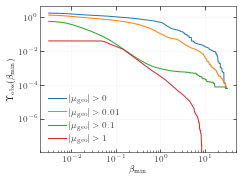

In [4]:
data = GSHEWaveform.read_shooting(13, "../data", 0.2)

betas = GSHEWaveform.read_signed_beta(data)
hull = GSHEWaveform.build_shadowhull(data["grid"], betas, N=200)
betas = GSHEWaveform.fillshadow(data["grid"], betas, hull)


mu = np.abs(data["Xgeo"][:, 8])
hull = GSHEWaveform.build_shadowhull(data["grid"], mu, N=200)
mu = GSHEWaveform.fillshadow(data["grid"], mu, hull)
betalims = np.logspace(-2.5, 1.5, 1000)

GSHEWaveform.setmplstyle("../plot_style.txt")
plt.figure()
for th in [0, 0.01, 0.1, 1]:
    ups = GSHEWaveform.get_upsilon_obs(
            data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0],
            magnification=mu, nloops=data["Xgeo"][:, 5], min_magnification=th, nloop_max=0)
    plt.plot(betalims, ups, label=r"$|\mu_{{\rm geo}}| > {}$".format(th))


plt.xscale("log")
plt.yscale("log")
# plt.title(r"Dependence of $\Upsilon_{\rm src}$ on $|\mu|$ for $N_{\rm loops} = 0$")
plt.ylabel(r"$\Upsilon_{\rm obs}(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")
plt.grid(alpha=0.1)
plt.legend()
plt.tight_layout()
# if tosave:
#     plt.savefig(join(fout, "ups_obs_magnif.pdf"), dpi=450)
plt.show()

# Generate output for forecast

In [20]:
np.sqrt(0.1), np.sqrt(0.05)
Nmax = 7
loop_name = '' if Nmax == 0 else ( '_all' if Nmax==7 else '_%i'%n)
loop_name

'_all'

In [68]:
#store as a function of the minimum magnification

r_src = 40
Nmax = 7
loop_name = '' if Nmax == 0 else ( '_all' if Nmax==7 else '_%i'%n)
print(r_src,loop_name)

#rescaling of mu and Upsilon by 1/r^2
r2_factor = (r_src/5.)**2

mu_min_arr = np.geomspace(1e-5,1.1e2,80)

data = GSHEWaveform.read_shooting(13, "../data", 0.2)

ups_obs_arr = []

for mu_min in mu_min_arr:
    mu = np.abs(data["Xgeo"][:, 8])
    mu/= r2_factor
    ups = GSHEWaveform.get_upsilon_obs(
            data["grid"], betas, betalims, dk=data["xs"][1] - data["xs"][0],
            magnification=mu, nloops=data["Xgeo"][:, 5], min_magnification=mu_min, nloop_max=Nmax)
    ups/= r2_factor
    print(mu_min)
    ups_obs_arr.append(ups)

40 _all
Eliminating 147 point due to beta with average 0.9592 loops.
1e-05
1.2278110934542724e-05
1.5075200812093729e-05
1.8509498793139535e-05
2.272616795249514e-05
2.79034411237785e-05
3.426015455732339e-05
4.2064997828939513e-05
5.164787098050182e-05
6.341382894315512e-05
7.786020265481731e-05
9.559762055818249e-05
0.00011737581902916854
0.00014411533270729406
0.00017694640423486898
0.00021725675806641596
0.0002667502576818562
0.00032751892556356845
0.000402131370123173
0.0004937413572631978
0.0006062211157449228
0.0007443250109978419
0.0009138905056386234
0.001122084901025635
0.0013777082892768124
0.0016915655211179762
0.0020769229121334063
0.0025500689917667494
0.003131002997164963
0.003844280213557713
0.004720049892552919
0.005795329619734115
0.007115569997333668
0.008736575778976656
0.01072686466023143
0.013170563427814742
0.01617096388371405
0.019854888848272474
0.024378052787210468
0.029931643648950824
0.0367504041175019
0.045122553864396356
0.055401972199693734
0.068023156066

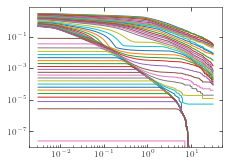

In [69]:
ups_obs_arr = np.array(ups_obs_arr)
for i,mu_min in enumerate(mu_min_arr):
    plt.loglog(betalims,ups_obs_arr[i,:],label='%g'%mu_min)
    
# plt.legend()

<ipython-input-70-17379498f3fe>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


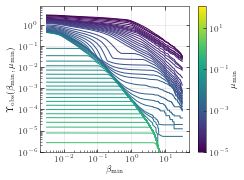

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

ups_obs_arr = np.array(ups_obs_arr)


fig, ax = plt.subplots()
lines = []

mu_min_norm = colors.LogNorm(vmin=min(mu_min_arr), vmax=max(mu_min_arr))
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=mu_min_norm, cmap='viridis'), ax=ax)
cmap = plt.cm.get_cmap('viridis')

for i, mu_min in enumerate(mu_min_arr):
    line, = ax.loglog(betalims, ups_obs_arr[i, :], c=cmap(mu_min_norm(mu_min)))
    lines.append(line)

cbar.set_label(r'$\mu_{\rm min}$')



ax.set_ylabel(r"$\Upsilon_{\rm obs}(\beta_{\rm min},\mu_{\rm min})$")
ax.set_xlabel(r"$\beta_{\rm min}$")
ax.set_ylim(1e-6,)
# ax.legend()
# plt.show()
ax.grid(alpha=0.3)
fig.tight_layout()
if tosave:
    fig.savefig(join(fout, "ups_obs_magnif_many_%g_%s.pdf")%(r_src,loop_name), dpi=450)

In [71]:
#save file
data_dict = {"betalims": betalims, "mu_min_arr": mu_min_arr, "ups_obs_arr": ups_obs_arr}
header = " ".join(data_dict.keys())
np.save("../data/Ups_obs_mu_min_%g%s"%(r_src,loop_name), data_dict, allow_pickle=True)

In [59]:
"../data/Ups_obs_mu_min_%g%s"%(r_src,loop_name)

'../data/Ups_obs_mu_min_35_all'